<a href="https://colab.research.google.com/github/lizchase/Python-Class-Projects/blob/main/Project_1_Elizabeth_Chase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Research Question
#I want to compare the high school nearest me to other high schools in Queens.  To do this, I will focus on the Common Core Algebra regents exam.

In [2]:
import pandas as pd
import numpy as np

**Data Exploration**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [4]:
df.shape

(212331, 15)

In [5]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [6]:
df.count()

School DBN                     212331
School Name                    212331
School Level                   212331
Regents Exam                   212321
Year                           212331
Total Tested                   212331
Mean Score                     212331
Number Scoring Below 65        212331
Percent Scoring Below 65       212331
Number Scoring 65 or Above     212331
Percent Scoring 65 or Above    212331
Number Scoring 80 or Above     212331
Percent Scoring 80 or Above    212331
Number Scoring CR              212331
Percent Scoring CR             212331
dtype: int64

In [7]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [8]:
df.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

**Data Cleaning and Filtering**

In [9]:
df2 = df[['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score']]  #Filters column data to relevent columns

In [10]:
s_count = df2.groupby('Mean Score').size()['s']
print(s_count)
#Shows the number of values that are 's'.  According to the data dictionary, 's' represents rows with 5 or fewer students.


75222


In [11]:
df3 = df2[df['Mean Score'] != 's'] #Removes rows with 's' in 'Mean Score' column
df3.count()  #Confirms that 's' values were dropped

School DBN      137109
School Name     137109
School Level    137109
Regents Exam    137101
Year            137109
Total Tested    137109
Mean Score      137109
dtype: int64

In [12]:
print(df3.dtypes)  #Shows that we will need to convert 'Mean Score' to a float value

School DBN      object
School Name     object
School Level    object
Regents Exam    object
Year             int64
Total Tested     int64
Mean Score      object
dtype: object


In [13]:
df3['Mean Score'] = df3['Mean Score'].astype(float)  #.apply(pd.to_numeric)  #.astype(float)  #Converts 'Mean Score' to float value
print(df3.dtypes)

School DBN       object
School Name      object
School Level     object
Regents Exam     object
Year              int64
Total Tested      int64
Mean Score      float64
dtype: object


<ipython-input-13-540b7e960151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Mean Score'] = df3['Mean Score'].astype(float)  #.apply(pd.to_numeric)  #.astype(float)  #Converts 'Mean Score' to float value


In [14]:
df3.describe()

,Year,Total Tested,Mean Score
count,137109.000000,137109.000000,137109.000000
mean,2015.957574,71.583813,65.998967
std,0.809287,107.834374,11.288883
min,2015.000000,6.000000,15.000000
25%,2015.000000,18.000000,58.300000
50%,2016.000000,39.000000,65.400000
75%,2017.000000,82.000000,73.400000
max,2017.000000,1729.000000,98.700000


In [15]:
df_queens = df3.loc[(df['School DBN'].str.contains('Q')) & (df['Regents Exam'] == 'Common Core Algebra')]  #Filters for Queens' Common Core Algebra scores
df_queens.count()

School DBN      4067
School Name     4067
School Level    4067
Regents Exam    4067
Year            4067
Total Tested    4067
Mean Score      4067
dtype: int64

In [16]:
df_LIC = df_queens[df['School DBN'].str.contains('30Q450')] #Filters for LIC High School 30Q450 from Queens Common Core Algebra results.
df_LIC.count()

<ipython-input-16-07019ddad2b3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_LIC = df_queens[df['School DBN'].str.contains('30Q450')] #Filters for LIC High School 30Q450 from Queens Common Core Algebra results.


School DBN      39
School Name     39
School Level    39
Regents Exam    39
Year            39
Total Tested    39
Mean Score      39
dtype: int64

**Analysis**

In [17]:
df_queens.describe()   #Summary statistics

,Year,Total Tested,Mean Score
count,4067.000000,4067.000000,4067.000000
mean,2016.043767,101.743300,70.647135
std,0.813712,146.625955,9.891669
min,2015.000000,6.000000,44.200000
25%,2015.000000,22.000000,63.500000
50%,2016.000000,53.000000,70.000000
75%,2017.000000,119.000000,77.700000
max,2017.000000,1384.000000,94.500000


In [18]:
df_LIC.describe()

,Year,Total Tested,Mean Score
count,39.00000,39.000000,39.000000
mean,2016.00000,333.589744,61.756410
std,0.82717,274.057017,4.894132
min,2015.00000,13.000000,50.700000
25%,2015.00000,118.500000,58.050000
50%,2016.00000,279.000000,62.500000
75%,2017.00000,481.000000,65.300000
max,2017.00000,1061.000000,69.800000


In [19]:
df_queens.groupby(['Year'])['Mean Score'].describe()   #Summary statistics by year for Queens

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,1261.0,66.284457,8.940129,44.2,59.70,66.1,72.4,90.3
2016,1367.0,72.180614,9.583636,46.6,65.05,71.3,79.5,92.5
2017,1439.0,73.013412,9.739207,44.5,65.50,72.2,80.5,94.5


In [20]:
df_LIC.groupby(['Year'])['Mean Score'].describe()  #Summary statistics by year for LIC HS

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,13.0,57.338462,3.051649,50.7,56.4,57.4,58.9,62.4
2016,13.0,62.830769,3.899869,54.3,62.5,63.2,65.2,69.6
2017,13.0,65.100000,4.101423,56.5,64.3,65.5,67.2,69.8


In [21]:
mean_queens = df_queens.groupby(['Year'])['Mean Score'].mean()  #Finding mean score for each year in Queens
mean_queens

Year
2015    66.284457
2016    72.180614
2017    73.013412
Name: Mean Score, dtype: float64

In [22]:
mean_LIC = df_LIC.groupby(['Year'])['Mean Score'].mean()  #Finding mean score for LIC HS for each year
mean_LIC

Year
2015    57.338462
2016    62.830769
2017    65.100000
Name: Mean Score, dtype: float64

In [23]:
combined_means = pd.DataFrame({'Queens': mean_queens, 'LIC HS': mean_LIC})   #Combining two groupby function into same table to enable plotting
combined_means


,Queens,LIC HS
Year,,
2015,66.284457,57.338462
2016,72.180614,62.830769
2017,73.013412,65.100000


[Text(0, 0, '57.3385'), Text(0, 0, '62.8308'), Text(0, 0, '65.1')]

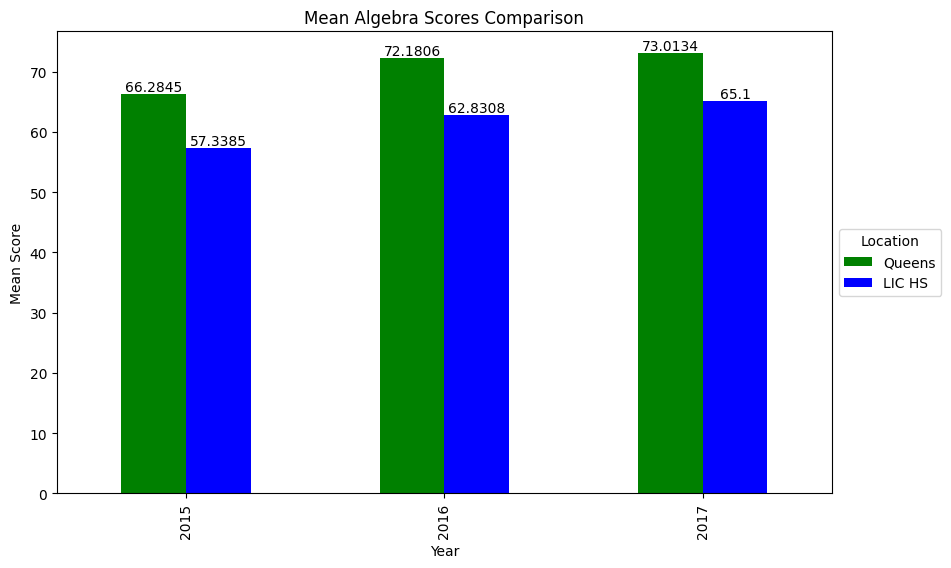

In [24]:
ax = combined_means.plot(kind='bar', figsize=(10, 6), color=['green', 'blue'])
ax.set(xlabel='Year', ylabel='Mean Score', title='Mean Algebra Scores Comparison')
ax.legend(title='Location', loc='center left', bbox_to_anchor=(1, 0.5))
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

**Conclusion**

As shown in the table and chart above, the average score in common core algebra at Long Island City High School falls behind the average score in the entire borough of Queens. Scores for both LIC HS and Queens as a whole improved from 2015 - 2017.